# Dermatology Diseases

## Data to  Use
The following dataset came from [Kaggle](https://www.kaggle.com/datasets/olcaybolat1/dermatology-dataset-classification)

## Define Problem
Given a patient's medical information, predict what type of dermatological Eryhemato-Squamous disease they have. 
This is a multi-classification ML task. 
- 0: Psoriasis
- 1: Deborrheic dermatitis
- 2: Lichen Planus
- 3: Pityriasis rosea
- 4: Chronic dermatitis
- 5: Pityriasis rubra pilaris

## Define Evaluation Metrics
If I can train a model to predict the type of dermatological disease with an accuracy rate of 95%+, then we can move forward with implementing an application. (but honestly, I have no idea what real business metric to set this by)


## Define Features to Use
     0   erythema                             366 non-null    int64 
     1   scaling                              366 non-null    int64 
     2   definite_borders                     366 non-null    int64 
     3   itching                              366 non-null    int64 
     4   koebner_phenomenon                   366 non-null    int64 
     5   polygonal_papules                    366 non-null    int64 
     6   follicular_papules                   366 non-null    int64 
     7   oral_mucosal_involvement             366 non-null    int64 
     8   knee_and_elbow_involvement           366 non-null    int64 
     9   scalp_involvement                    366 non-null    int64 
     10  family_history                       366 non-null    int64 
     11  melanin_incontinence                 366 non-null    int64 
     12  eosinophils_infiltrate               366 non-null    int64 
     13  PNL_infiltrate                       366 non-null    int64 
     14  fibrosis_papillary_dermis            366 non-null    int64 
     15  exocytosis                           366 non-null    int64 
     16  acanthosis                           366 non-null    int64 
     17  hyperkeratosis                       366 non-null    int64 
     18  parakeratosis                        366 non-null    int64 
     19  clubbing_rete_ridges                 366 non-null    int64 
     20  elongation_rete_ridges               366 non-null    int64 
     21  thinning_suprapapillary_epidermis    366 non-null    int64 
     22  spongiform_pustule                   366 non-null    int64 
     23  munro_microabcess                    366 non-null    int64 
     24  focal_hypergranulosis                366 non-null    int64 
     25  disappearance_granular_layer         366 non-null    int64 
     26  vacuolisation_damage_basal_layer     366 non-null    int64 
     27  spongiosis                           366 non-null    int64 
     28  saw_tooth_appearance_retes           366 non-null    int64 
     29  follicular_horn_plug                 366 non-null    int64 
     30  perifollicular_parakeratosis         366 non-null    int64 
     31  inflammatory_mononuclear_infiltrate  366 non-null    int64 
     32  band_like_infiltrate                 366 non-null    int64 
     33  age                                  366 non-null    object
     34  class                                366 non-null    int64 

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# preprocess
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


# modeling
import xgboost as xgb
import lightgbm as lgbm
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


# evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [5]:
df = pd.read_csv("data/dermatology_database_1.csv", delimiter=",")
df

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


## Exporatory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

**Note**: 
- The 'age' feature is an object. It should be numerical. Keep this in mind as part of the data cleaning to convert this feature from object to int64. 
- Most of these features are integers, but these numbers are associated to categorical features. Keep this in mind as we preprocess which features are categorical variables.

### Missing Values Analysis

In [7]:
df_bool = (df == "?")

In [8]:
df_bool.sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

**Note**: Looks like there are 8 sample missing the 'age' feature. In order to determine how to impute these values, I wish to see how much of an impact 'age' has on determining the type of disease. If there is little to no significance between the two variables, then I may consider dropping these 8 values. 

### Distribution of Each Attribute

In [9]:
df.dtypes

erythema                                int64
scaling                                 int64
definite_borders                        int64
itching                                 int64
koebner_phenomenon                      int64
polygonal_papules                       int64
follicular_papules                      int64
oral_mucosal_involvement                int64
knee_and_elbow_involvement              int64
scalp_involvement                       int64
family_history                          int64
melanin_incontinence                    int64
eosinophils_infiltrate                  int64
PNL_infiltrate                          int64
fibrosis_papillary_dermis               int64
exocytosis                              int64
acanthosis                              int64
hyperkeratosis                          int64
parakeratosis                           int64
clubbing_rete_ridges                    int64
elongation_rete_ridges                  int64
thinning_suprapapillary_epidermis 

### Class Distribution

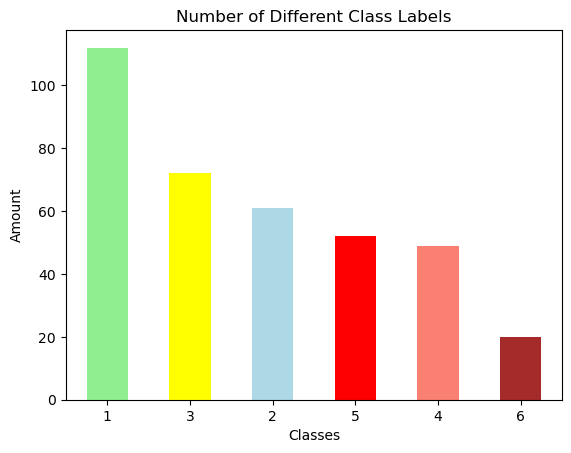

In [11]:
df['class'].value_counts().plot(kind="bar", color=["lightgreen","yellow", "lightblue", "red", "salmon", "brown"])
plt.title("Number of Different Class Labels")
plt.xticks(rotation=0)
plt.ylabel("Amount")
plt.xlabel("Classes")
plt.show()

### Outlier Detection

### EDA Takeaways:

## Data Cleaning

In [150]:
categorical_features = [
    'erythema', 
    'scaling', 
    'definite_borders', 
    'itching',
    'koebner_phenomenon', 
    'polygonal_papules', 
    'follicular_papules',
    'oral_mucosal_involvement', 
    'knee_and_elbow_involvement',
    'scalp_involvement', 
    'family_history', 
    'melanin_incontinence',
    'eosinophils_infiltrate', 
    'PNL_infiltrate', 
    'fibrosis_papillary_dermis',
    'exocytosis', 
    'acanthosis', 
    'hyperkeratosis', 
    'parakeratosis',
    'clubbing_rete_ridges', 
    'elongation_rete_ridges',
    'thinning_suprapapillary_epidermis', 
    'spongiform_pustule',
    'munro_microabcess', 
    'focal_hypergranulosis',
    'disappearance_granular_layer', 
    'vacuolisation_damage_basal_layer',
    'spongiosis', 
    'saw_tooth_appearance_retes', 
    'follicular_horn_plug',
    'perifollicular_parakeratosis', 
    'inflammatory_mononuclear_infiltrate',
    'band_like_infiltrate']


### Remove Missing Data

In [127]:
# drop the 8 unknown cells from age column
df['age'] = df['age'].replace('?', np.nan)
df.dropna(subset=['age'], inplace=True)
df

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


### Convert 'Age' Object to int64

In [128]:
df['age'] = df['age'].astype('int64')
df['age'].dtype

dtype('int64')

### Correlation Analysis

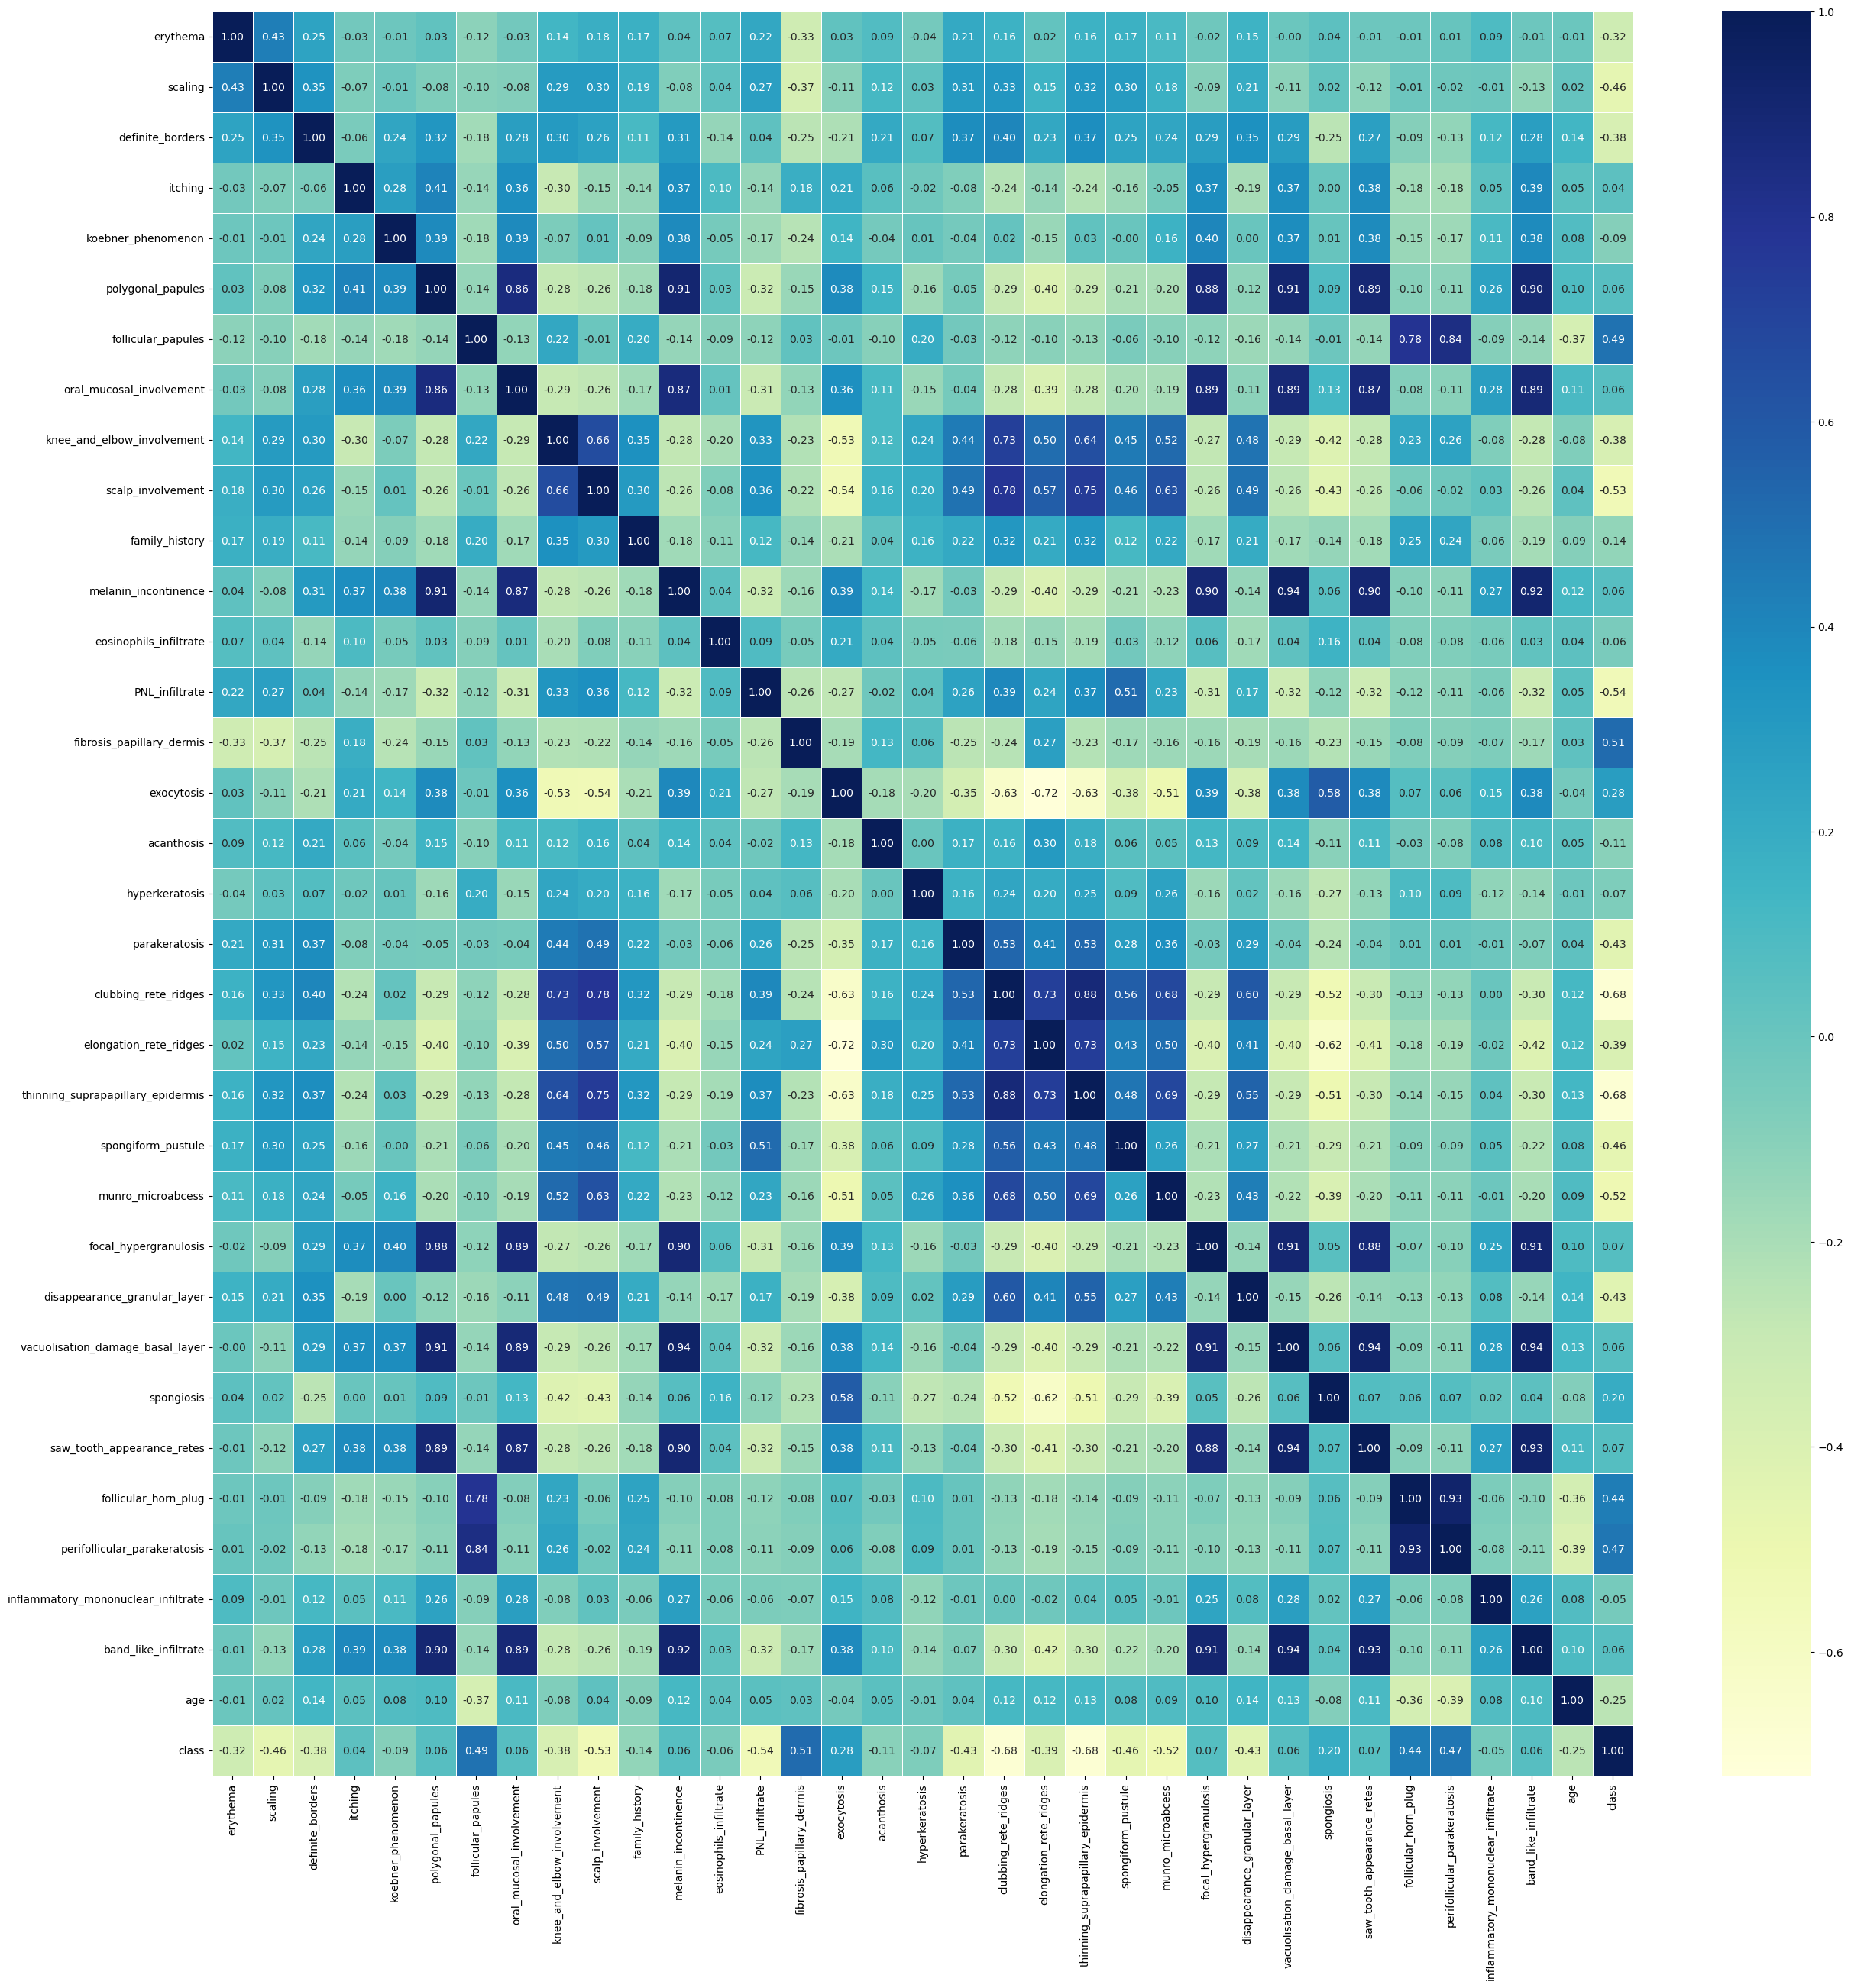

In [15]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(30, 30))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt="0.2f",
                cmap="YlGnBu");

## Modeling

### Preprocessing

In [223]:
results = {}
model_metrics = {}
models = {
    "LogisticRegression": LogisticRegression(),   
    "KNN": KNeighborsClassifier(),
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "ExtraTreeClassifier": ExtraTreeClassifier(),
    "SVC": SVC(),
    "MLPClassifier": MLPClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "XGBClassifier": xgb.XGBClassifier(),
    "LGBMClassifier": lgbm.LGBMClassifier(),
    "CatBoostClassifier": CatBoostClassifier(),
    "SGDClassifier": SGDClassifier(loss='log'),
    "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
    "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis()
}

In [224]:
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
    ])

### Split

In [225]:
X = df.drop("class", axis=1)

le = LabelEncoder()
y = le.fit_transform(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# x = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


### Training (Baseline Models)

In [195]:
# this doesn't work :( 

# import time

# start_training = time.time()
    
# model_pipeline = Pipeline(steps = [
#     ("preprocessor", preprocessor),
#     ("model", LogisticRegression())
# ])

# model_pipeline.fit(X_train, y_train)
# y_preds = model_pipeline.predict(X_test)

# end_training = time.time()
# training_time = end_training - start_training
    
# model_metrics['LogisticRegression'] = [
#     accuracy_score(y_test, y_preds),
#     precision_score(y_test, y_preds, average='weighted'),
#     recall_score(y_test, y_preds, average='weighted'),
#     f1_score(y_test, y_preds, average='weighted'),
#     training_time
# ]

#### Logistic Regression

In [226]:
import time
start_training = time.time()
    
model_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", LogisticRegression())
])

model_pipeline.fit(X_train, y_train)
y_preds = model_pipeline.predict(X_test)

end_training = time.time()
training_time = end_training - start_training
    
model_metrics['LogisticRegression'] = [
    accuracy_score(y_test, y_preds),
    precision_score(y_test, y_preds, average='weighted'),
    recall_score(y_test, y_preds, average='weighted'),
    f1_score(y_test, y_preds, average='weighted'),
    training_time
]

C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### KNN

In [227]:
start_training = time.time()
    
model_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", KNeighborsClassifier())
])

model_pipeline.fit(X_train, y_train)
y_preds = model_pipeline.predict(X_test)

end_training = time.time()
training_time = end_training - start_training
    
model_metrics['KNeighborsClassifier'] = [
    accuracy_score(y_test, y_preds),
    precision_score(y_test, y_preds, average='weighted'),
    recall_score(y_test, y_preds, average='weighted'),
    f1_score(y_test, y_preds, average='weighted'),
    training_time
]

#### DecisionTreeClassifier

In [228]:
start_training = time.time()
    
model_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier())
])

model_pipeline.fit(X_train, y_train)
y_preds = model_pipeline.predict(X_test)

end_training = time.time()
training_time = end_training - start_training
    
model_metrics['DecisionTreeClassifier'] = [
    accuracy_score(y_test, y_preds),
    precision_score(y_test, y_preds, average='weighted'),
    recall_score(y_test, y_preds, average='weighted'),
    f1_score(y_test, y_preds, average='weighted'),
    training_time
]

#### RandomForestClassifier

In [229]:
start_training = time.time()
    
model_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier())
])

model_pipeline.fit(X_train, y_train)
y_preds = model_pipeline.predict(X_test)

end_training = time.time()
training_time = end_training - start_training
    
model_metrics['RandomForestClassifier'] = [
    accuracy_score(y_test, y_preds),
    precision_score(y_test, y_preds, average='weighted'),
    recall_score(y_test, y_preds, average='weighted'),
    f1_score(y_test, y_preds, average='weighted'),
    training_time
]

#### ExtraTreesClassifier

In [230]:
start_training = time.time()
    
model_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", ExtraTreesClassifier())
])

model_pipeline.fit(X_train, y_train)
y_preds = model_pipeline.predict(X_test)

end_training = time.time()
training_time = end_training - start_training
    
model_metrics['ExtraTreesClassifier'] = [
    accuracy_score(y_test, y_preds),
    precision_score(y_test, y_preds, average='weighted'),
    recall_score(y_test, y_preds, average='weighted'),
    f1_score(y_test, y_preds, average='weighted'),
    training_time
]

#### SVM

In [231]:
start_training = time.time()
    
model_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", SVC())
])

model_pipeline.fit(X_train, y_train)
y_preds = model_pipeline.predict(X_test)

end_training = time.time()
training_time = end_training - start_training
    
model_metrics['SVC'] = [
    accuracy_score(y_test, y_preds),
    precision_score(y_test, y_preds, average='weighted'),
    recall_score(y_test, y_preds, average='weighted'),
    f1_score(y_test, y_preds, average='weighted'),
    training_time
]

#### MLPClassifier

In [232]:
start_training = time.time()
    
model_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", MLPClassifier())
])

model_pipeline.fit(X_train, y_train)
y_preds = model_pipeline.predict(X_test)

end_training = time.time()
training_time = end_training - start_training
    
model_metrics['MLPClassifier'] = [
    accuracy_score(y_test, y_preds),
    precision_score(y_test, y_preds, average='weighted'),
    recall_score(y_test, y_preds, average='weighted'),
    f1_score(y_test, y_preds, average='weighted'),
    training_time
]

C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### AdaBoost

In [233]:
start_training = time.time()
    
model_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", AdaBoostClassifier())
])

model_pipeline.fit(X_train, y_train)
y_preds = model_pipeline.predict(X_test)

end_training = time.time()
training_time = end_training - start_training
    
model_metrics['AdaBoostClassifier'] = [
    accuracy_score(y_test, y_preds),
    precision_score(y_test, y_preds, average='weighted'),
    recall_score(y_test, y_preds, average='weighted'),
    f1_score(y_test, y_preds, average='weighted'),
    training_time
]

C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### XGBoost

In [234]:
start_training = time.time()
    
model_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", xgb.XGBClassifier())
])

model_pipeline.fit(X_train, y_train)
y_preds = model_pipeline.predict(X_test)

end_training = time.time()
training_time = end_training - start_training
    
model_metrics['XGBClassifier'] = [
    accuracy_score(y_test, y_preds),
    precision_score(y_test, y_preds, average='weighted'),
    recall_score(y_test, y_preds, average='weighted'),
    f1_score(y_test, y_preds, average='weighted'),
    training_time
]

#### LGBMClassifier

In [235]:
start_training = time.time()
    
model_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", lgbm.LGBMClassifier())
])

model_pipeline.fit(X_train, y_train)
y_preds = model_pipeline.predict(X_test)

end_training = time.time()
training_time = end_training - start_training
    
model_metrics['LGBMClassifier'] = [
    accuracy_score(y_test, y_preds),
    precision_score(y_test, y_preds, average='weighted'),
    recall_score(y_test, y_preds, average='weighted'),
    f1_score(y_test, y_preds, average='weighted'),
    training_time
]

#### CatBoostClassifier

In [236]:
start_training = time.time()
    
model_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", CatBoostClassifier())
])

model_pipeline.fit(X_train, y_train)
y_preds = model_pipeline.predict(X_test)

end_training = time.time()
training_time = end_training - start_training
    
model_metrics['CatBoostClassifier'] = [
    accuracy_score(y_test, y_preds),
    precision_score(y_test, y_preds, average='weighted'),
    recall_score(y_test, y_preds, average='weighted'),
    f1_score(y_test, y_preds, average='weighted'),
    training_time
]

Learning rate set to 0.074233
0:	learn: 1.6674523	total: 153ms	remaining: 2m 33s
1:	learn: 1.4900127	total: 157ms	remaining: 1m 18s
2:	learn: 1.3593459	total: 160ms	remaining: 53.2s
3:	learn: 1.2546340	total: 163ms	remaining: 40.6s
4:	learn: 1.1701582	total: 166ms	remaining: 33s
5:	learn: 1.0898960	total: 168ms	remaining: 27.9s
6:	learn: 1.0195940	total: 171ms	remaining: 24.2s
7:	learn: 0.9552776	total: 173ms	remaining: 21.4s
8:	learn: 0.8848579	total: 175ms	remaining: 19.3s
9:	learn: 0.8422214	total: 177ms	remaining: 17.6s
10:	learn: 0.7888328	total: 180ms	remaining: 16.1s
11:	learn: 0.7424752	total: 182ms	remaining: 15s
12:	learn: 0.7140321	total: 184ms	remaining: 14s
13:	learn: 0.6798897	total: 186ms	remaining: 13.1s
14:	learn: 0.6498569	total: 189ms	remaining: 12.4s
15:	learn: 0.6190493	total: 191ms	remaining: 11.7s
16:	learn: 0.5860832	total: 193ms	remaining: 11.2s
17:	learn: 0.5585379	total: 195ms	remaining: 10.7s
18:	learn: 0.5333042	total: 197ms	remaining: 10.2s
19:	learn: 0.51

207:	learn: 0.0388604	total: 590ms	remaining: 2.25s
208:	learn: 0.0387199	total: 592ms	remaining: 2.24s
209:	learn: 0.0385846	total: 595ms	remaining: 2.24s
210:	learn: 0.0384413	total: 597ms	remaining: 2.23s
211:	learn: 0.0383045	total: 599ms	remaining: 2.23s
212:	learn: 0.0381501	total: 601ms	remaining: 2.22s
213:	learn: 0.0379652	total: 603ms	remaining: 2.21s
214:	learn: 0.0377978	total: 605ms	remaining: 2.21s
215:	learn: 0.0375619	total: 607ms	remaining: 2.2s
216:	learn: 0.0372556	total: 609ms	remaining: 2.2s
217:	learn: 0.0371198	total: 611ms	remaining: 2.19s
218:	learn: 0.0367993	total: 621ms	remaining: 2.21s
219:	learn: 0.0366314	total: 623ms	remaining: 2.21s
220:	learn: 0.0364695	total: 625ms	remaining: 2.2s
221:	learn: 0.0362650	total: 627ms	remaining: 2.2s
222:	learn: 0.0360559	total: 629ms	remaining: 2.19s
223:	learn: 0.0359162	total: 631ms	remaining: 2.19s
224:	learn: 0.0358286	total: 633ms	remaining: 2.18s
225:	learn: 0.0356965	total: 635ms	remaining: 2.17s
226:	learn: 0.03

392:	learn: 0.0189389	total: 973ms	remaining: 1.5s
393:	learn: 0.0188984	total: 975ms	remaining: 1.5s
394:	learn: 0.0188068	total: 977ms	remaining: 1.5s
395:	learn: 0.0186964	total: 979ms	remaining: 1.49s
396:	learn: 0.0186645	total: 981ms	remaining: 1.49s
397:	learn: 0.0185536	total: 984ms	remaining: 1.49s
398:	learn: 0.0185116	total: 986ms	remaining: 1.48s
399:	learn: 0.0184506	total: 988ms	remaining: 1.48s
400:	learn: 0.0184105	total: 990ms	remaining: 1.48s
401:	learn: 0.0183625	total: 992ms	remaining: 1.48s
402:	learn: 0.0183191	total: 994ms	remaining: 1.47s
403:	learn: 0.0182764	total: 996ms	remaining: 1.47s
404:	learn: 0.0182382	total: 998ms	remaining: 1.47s
405:	learn: 0.0181910	total: 1s	remaining: 1.46s
406:	learn: 0.0181557	total: 1s	remaining: 1.46s
407:	learn: 0.0181106	total: 1s	remaining: 1.46s
408:	learn: 0.0180677	total: 1.01s	remaining: 1.45s
409:	learn: 0.0180211	total: 1.01s	remaining: 1.45s
410:	learn: 0.0179346	total: 1.01s	remaining: 1.45s
411:	learn: 0.0178838	to

575:	learn: 0.0121961	total: 1.36s	remaining: 999ms
576:	learn: 0.0121793	total: 1.36s	remaining: 996ms
577:	learn: 0.0121595	total: 1.36s	remaining: 994ms
578:	learn: 0.0121381	total: 1.36s	remaining: 991ms
579:	learn: 0.0121202	total: 1.36s	remaining: 989ms
580:	learn: 0.0120993	total: 1.37s	remaining: 986ms
581:	learn: 0.0120563	total: 1.37s	remaining: 984ms
582:	learn: 0.0120242	total: 1.37s	remaining: 982ms
583:	learn: 0.0120087	total: 1.37s	remaining: 979ms
584:	learn: 0.0119854	total: 1.38s	remaining: 977ms
585:	learn: 0.0119616	total: 1.38s	remaining: 974ms
586:	learn: 0.0119098	total: 1.38s	remaining: 972ms
587:	learn: 0.0118963	total: 1.38s	remaining: 969ms
588:	learn: 0.0118781	total: 1.39s	remaining: 967ms
589:	learn: 0.0118655	total: 1.39s	remaining: 964ms
590:	learn: 0.0118521	total: 1.39s	remaining: 961ms
591:	learn: 0.0118364	total: 1.39s	remaining: 959ms
592:	learn: 0.0117814	total: 1.39s	remaining: 956ms
593:	learn: 0.0117639	total: 1.4s	remaining: 954ms
594:	learn: 0

756:	learn: 0.0088532	total: 1.73s	remaining: 556ms
757:	learn: 0.0088419	total: 1.74s	remaining: 554ms
758:	learn: 0.0088311	total: 1.74s	remaining: 552ms
759:	learn: 0.0088228	total: 1.74s	remaining: 550ms
760:	learn: 0.0088142	total: 1.74s	remaining: 547ms
761:	learn: 0.0088056	total: 1.74s	remaining: 545ms
762:	learn: 0.0087967	total: 1.75s	remaining: 542ms
763:	learn: 0.0087822	total: 1.75s	remaining: 540ms
764:	learn: 0.0087525	total: 1.75s	remaining: 538ms
765:	learn: 0.0087400	total: 1.75s	remaining: 536ms
766:	learn: 0.0087331	total: 1.75s	remaining: 533ms
767:	learn: 0.0087186	total: 1.76s	remaining: 531ms
768:	learn: 0.0087057	total: 1.76s	remaining: 528ms
769:	learn: 0.0086960	total: 1.76s	remaining: 526ms
770:	learn: 0.0086827	total: 1.76s	remaining: 524ms
771:	learn: 0.0086675	total: 1.76s	remaining: 521ms
772:	learn: 0.0086564	total: 1.77s	remaining: 519ms
773:	learn: 0.0086392	total: 1.77s	remaining: 517ms
774:	learn: 0.0086226	total: 1.77s	remaining: 514ms
775:	learn: 

946:	learn: 0.0069449	total: 2.12s	remaining: 118ms
947:	learn: 0.0069371	total: 2.12s	remaining: 116ms
948:	learn: 0.0069295	total: 2.12s	remaining: 114ms
949:	learn: 0.0069194	total: 2.12s	remaining: 112ms
950:	learn: 0.0069135	total: 2.13s	remaining: 110ms
951:	learn: 0.0069076	total: 2.13s	remaining: 107ms
952:	learn: 0.0068935	total: 2.13s	remaining: 105ms
953:	learn: 0.0068885	total: 2.13s	remaining: 103ms
954:	learn: 0.0068808	total: 2.13s	remaining: 101ms
955:	learn: 0.0068746	total: 2.14s	remaining: 98.3ms
956:	learn: 0.0068691	total: 2.14s	remaining: 96.1ms
957:	learn: 0.0068641	total: 2.14s	remaining: 93.9ms
958:	learn: 0.0068575	total: 2.14s	remaining: 91.6ms
959:	learn: 0.0068512	total: 2.14s	remaining: 89.4ms
960:	learn: 0.0068380	total: 2.15s	remaining: 87.1ms
961:	learn: 0.0068282	total: 2.15s	remaining: 84.9ms
962:	learn: 0.0068223	total: 2.15s	remaining: 82.7ms
963:	learn: 0.0068163	total: 2.15s	remaining: 80.4ms
964:	learn: 0.0068025	total: 2.16s	remaining: 78.2ms
96

#### SGDClassifier

In [237]:
start_training = time.time()
    
model_pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", SGDClassifier(loss='log'))
])

model_pipeline.fit(X_train, y_train)
y_preds = model_pipeline.predict(X_test)

end_training = time.time()
training_time = end_training - start_training
    
model_metrics['SGDClassifier'] = [
    accuracy_score(y_test, y_preds),
    precision_score(y_test, y_preds, average='weighted'),
    recall_score(y_test, y_preds, average='weighted'),
    f1_score(y_test, y_preds, average='weighted'),
    training_time
]

C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


### Evaluation

#### Metrics

In [240]:
model_metrics

{'LogisticRegression': [0.9861111111111112,
  0.9872685185185185,
  0.9861111111111112,
  0.9861735798767283,
  0.06799936294555664],
 'KNeighborsClassifier': [0.9305555555555556,
  0.937555114638448,
  0.9305555555555556,
  0.928834422657952,
  0.044023752212524414],
 'DecisionTreeClassifier': [0.875,
  0.8938731060606061,
  0.875,
  0.8666699170171392,
  0.02602410316467285],
 'RandomForestClassifier': [0.9861111111111112,
  0.9872685185185185,
  0.9861111111111112,
  0.9861735798767283,
  0.20800542831420898],
 'ExtraTreesClassifier': [0.9722222222222222,
  0.9764957264957265,
  0.9722222222222222,
  0.972387566137566,
  0.1930370330810547],
 'SVC': [0.9722222222222222,
  0.9764957264957265,
  0.9722222222222222,
  0.972387566137566,
  0.0390629768371582],
 'MLPClassifier': [0.9583333333333334,
  0.9672619047619047,
  0.9583333333333334,
  0.9585185185185185,
  0.6245205402374268],
 'AdaBoostClassifier': [0.7777777777777778,
  0.660300925925926,
  0.7777777777777778,
  0.70153664302

In [243]:
df_results = pd.DataFrame.from_dict(model_metrics, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', "training_time"])

df_results

,Accuracy,Precision,Recall,F1-Score,training_time
LogisticRegression,0.986111,0.987269,0.986111,0.986174,0.067999
KNeighborsClassifier,0.930556,0.937555,0.930556,0.928834,0.044024
DecisionTreeClassifier,0.875000,0.893873,0.875000,0.866670,0.026024
RandomForestClassifier,0.986111,0.987269,0.986111,0.986174,0.208005
ExtraTreesClassifier,0.972222,0.976496,0.972222,0.972388,0.193037
SVC,0.972222,0.976496,0.972222,0.972388,0.039063
MLPClassifier,0.958333,0.967262,0.958333,0.958519,0.624521
AdaBoostClassifier,0.777778,0.660301,0.777778,0.701537,0.132996
XGBClassifier,0.958333,0.961911,0.958333,0.958578,0.184508
LGBMClassifier,0.958333,0.961911,0.958333,0.958578,0.225001


Looks like the following models have the best metrics:
- LogisticRegression
- RandomForestClassifier
- SGDClassifier

#### Feature Importance

##### Logistic Regression

In [269]:
log_reg = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", LogisticRegression())
])

log_reg.fit(X_train, y_train)
coefs = log_reg.named_steps["model"].coef_.flatten()

C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [251]:
import pandas as pd
# Zip coefficients and names together and make a DataFrame
zipped = zip(X.columns, coefs)
df_features = pd.DataFrame(zipped, columns=["feature", "value"])
# Sort the features by the absolute value of their coefficient
df_features["abs_value"] = df_features["value"].apply(lambda x: abs(x))
df_features["colors"] = df_features["value"].apply(lambda x: "green" if x > 0 else "red")
df_features = df_features.sort_values("abs_value", ascending=False)

Text(0.5, 0, 'Feature Name')

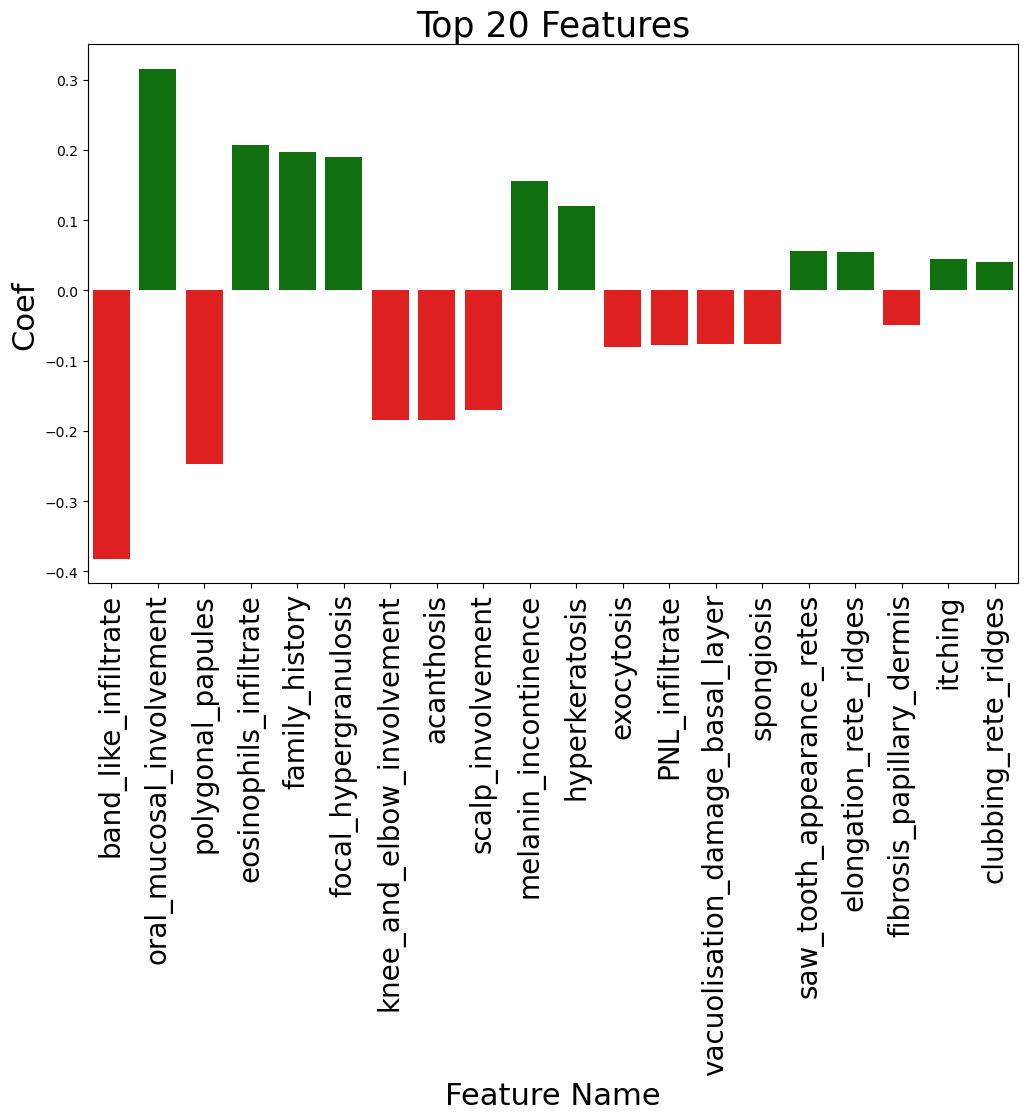

In [252]:
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df_features.head(20),
           palette=df_features.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

In [274]:
from sklearn.metrics import classification_report
y_preds = log_reg.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00        10
           3       0.92      1.00      0.96        11
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



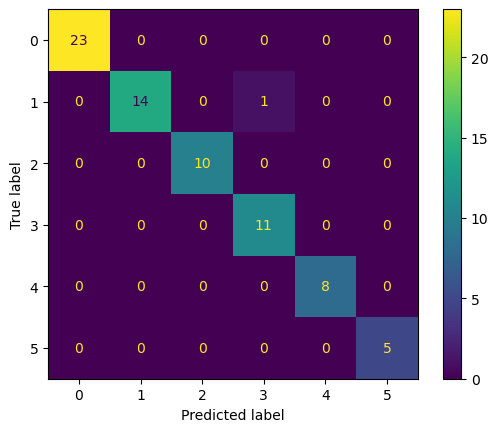

In [273]:
from sklearn.metrics import ConfusionMatrixDisplay
y_preds = log_reg.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                     y_pred=y_preds)

### Modeling Takeaways:

## Tuning/Improving Model

In [255]:
random_tuned_metrics = {}

In [256]:
log_reg_params = {
    "model__C": [0.01, 0.5, 1],
    "model__solver": ['liblinear', 'lbfgs']
}

rf_params = {
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ['auto'],
    "model__min_samples_split": [2, 4]
}

sgd_params = {
    "model__loss": ['log_loss', 'perceptron'],
    "model__alpha": [0.001, 0.01]
}

### RandomizedSearchCV

#### Logistic Regression

In [257]:
log_reg = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", LogisticRegression())
])

log_reg_random_search = RandomizedSearchCV(log_reg,
                                          param_distributions=log_reg_params,
                                          n_iter=10,
                                          cv=5,
                                          verbose=2)
log_reg_random_search.fit(X_train, y_train)
y_preds = log_reg_random_search.predict(X_test)

random_tuned_metrics['LogisticRegression'] = [
    accuracy_score(y_test, y_preds),
    precision_score(y_test, y_preds, average='weighted'),
    recall_score(y_test, y_preds, average='weighted'),
    f1_score(y_test, y_preds, average='weighted'),
]

C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .............model__C=0.01, model__solver=liblinear; total time=   0.0s
[CV] END .............model__C=0.01, model__solver=liblinear; total time=   0.0s
[CV] END .............model__C=0.01, model__solver=liblinear; total time=   0.0s
[CV] END .............model__C=0.01, model__solver=liblinear; total time=   0.0s
[CV] END .............model__C=0.01, model__solver=liblinear; total time=   0.0s
[CV] END .................model__C=0.01, model__solver=lbfgs; total time=   0.0s
[CV] END .................model__C=0.01, model__solver=lbfgs; total time=   0.0s
[CV] END .................model__C=0.01, model__solver=lbfgs; total time=   0.0s
[CV] END .................model__C=0.01, model__solver=lbfgs; total time=   0.0s
[CV] END .................model__C=0.01, model__solver=lbfgs; total time=   0.0s
[CV] END ..............model__C=0.5, model__solver=liblinear; total time=   0.0s
[CV] END ..............model__C=0.5, model__solve

C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................model__C=0.5, model__solver=lbfgs; total time=   0.0s
[CV] END ..................model__C=0.5, model__solver=lbfgs; total time=   0.0s
[CV] END ..................model__C=0.5, model__solver=lbfgs; total time=   0.0s
[CV] END ................model__C=1, model__solver=liblinear; total time=   0.0s
[CV] END ................model__C=1, model__solver=liblinear; total time=   0.0s
[CV] END ................model__C=1, model__solver=liblinear; total time=   0.0s
[CV] END ................model__C=1, model__solver=liblinear; total time=   0.0s
[CV] END ................model__C=1, model__solver=liblinear; total time=   0.0s
[CV] END ....................model__C=1, model__solver=lbfgs; total time=   0.0s
[CV] END ....................model__C=1, model__solver=lbfgs; total time=   0.0s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END ....................model__C=1, model__solver=lbfgs; total time=   0.0s
[CV] END ....................model__C=1, model__solver=lbfgs; total time=   0.0s
[CV] END ....................model__C=1, model__solver=lbfgs; total time=   0.0s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Random Forest Classifier

In [258]:
rf = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier())
])

rf_random_search = RandomizedSearchCV(rf,
                                          param_distributions=rf_params,
                                          n_iter=10,
                                          cv=5,
                                          verbose=2)
rf_random_search.fit(X_train, y_train)
y_preds = rf_random_search.predict(X_test)

random_tuned_metrics['RandomForestClassifier'] = [
    accuracy_score(y_test, y_preds),
    precision_score(y_test, y_preds, average='weighted'),
    recall_score(y_test, y_preds, average='weighted'),
    f1_score(y_test, y_preds, average='weighted'),
]

C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000; total time=   1.7s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000; total time=   1.7s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000; total time=   1.7s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000; total time=   1.7s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000; total time=   2.0s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000; total time=   1.8s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000; total time=   1.7s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000; total time=   1.7s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000; total time=   1.6s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000; total time=   1.7s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000; total time=   1.5s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000; total time=   1.5s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000; total time=   1.6s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000; total time=   1.7s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000; total time=   1.5s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000; total time=   1.5s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000; total time=   1.5s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000; total time=   1.5s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000; total time=   1.5s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000; total time=   1.5s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


#### SGDClassifier

In [259]:
sgd = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", SGDClassifier())
])

sgd_random_search = RandomizedSearchCV(sgd,
                                          param_distributions=sgd_params,
                                          n_iter=10,
                                          cv=5,
                                          verbose=2)
sgd_random_search.fit(X_train, y_train)
y_preds = sgd_random_search.predict(X_test)

random_tuned_metrics['SGDClassifier'] = [
    accuracy_score(y_test, y_preds),
    precision_score(y_test, y_preds, average='weighted'),
    recall_score(y_test, y_preds, average='weighted'),
    f1_score(y_test, y_preds, average='weighted'),
]

C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...........model__alpha=0.001, model__loss=log_loss; total time=   0.0s
[CV] END ...........model__alpha=0.001, model__loss=log_loss; total time=   0.0s
[CV] END ...........model__alpha=0.001, model__loss=log_loss; total time=   0.0s
[CV] END ...........model__alpha=0.001, model__loss=log_loss; total time=   0.0s
[CV] END ...........model__alpha=0.001, model__loss=log_loss; total time=   0.0s
[CV] END .........model__alpha=0.001, model__loss=perceptron; total time=   0.0s
[CV] END .........model__alpha=0.001, model__loss=perceptron; total time=   0.0s
[CV] END .........model__alpha=0.001, model__loss=perceptron; total time=   0.0s
[CV] END .........model__alpha=0.001, model__loss=perceptron; total time=   0.0s
[CV] END .........model__alpha=0.001, model__loss=perceptron; total time=   0.0s
[CV] END ............model__alpha=0.01, model__loss=log_loss; total time=   0.0s
[CV] END ............model__alpha=0.01, model__lo

In [260]:
tuned_results = pd.DataFrame.from_dict(random_tuned_metrics, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

tuned_results

,Accuracy,Precision,Recall,F1-Score
LogisticRegression,0.972222,0.976496,0.972222,0.972388
RandomForestClassifier,0.986111,0.987269,0.986111,0.986174
SGDClassifier,0.986111,0.987269,0.986111,0.986174


#### Visualize

<Axes: >

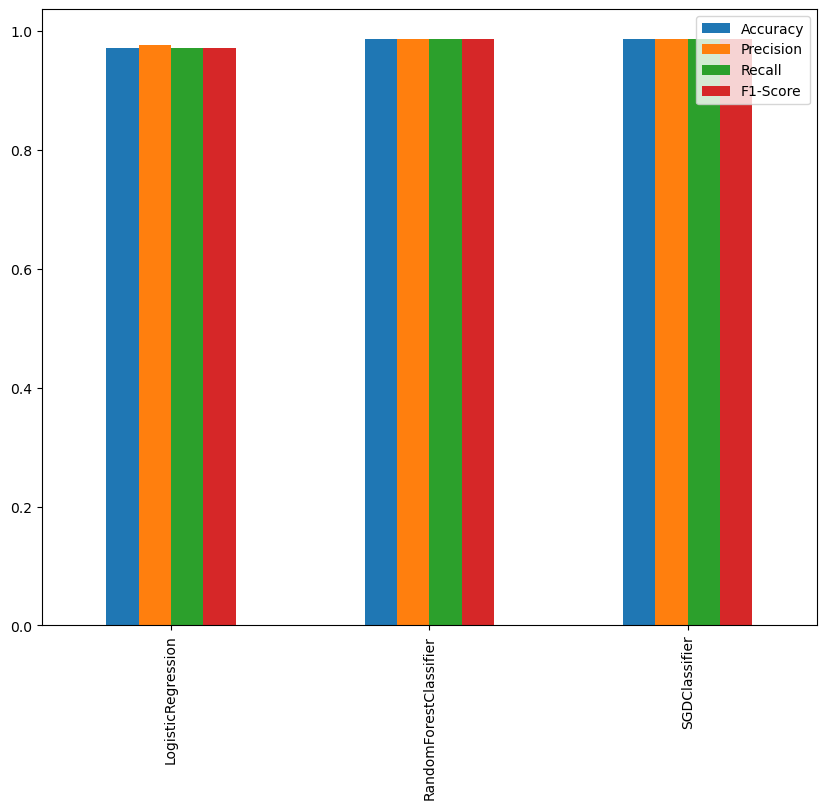

In [261]:
tuned_results.plot.bar(figsize=(10, 8))

### GridSearchCV

In [262]:
grid_tuned_metrics = {}

#### Logistic Regression

In [263]:
log_reg = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", LogisticRegression())
])

log_reg_grid_search = GridSearchCV(log_reg,
                                  param_grid=log_reg_params,
                                  cv=5,
                                  verbose=2)
log_reg_grid_search.fit(X_train, y_train)
y_preds = log_reg_grid_search.predict(X_test)

grid_tuned_metrics['LogisticRegression'] = [
    accuracy_score(y_test, y_preds),
    precision_score(y_test, y_preds, average='weighted'),
    recall_score(y_test, y_preds, average='weighted'),
    f1_score(y_test, y_preds, average='weighted'),
]

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .............model__C=0.01, model__solver=liblinear; total time=   0.0s
[CV] END .............model__C=0.01, model__solver=liblinear; total time=   0.0s
[CV] END .............model__C=0.01, model__solver=liblinear; total time=   0.0s
[CV] END .............model__C=0.01, model__solver=liblinear; total time=   0.0s
[CV] END .............model__C=0.01, model__solver=liblinear; total time=   0.0s
[CV] END .................model__C=0.01, model__solver=lbfgs; total time=   0.0s
[CV] END .................model__C=0.01, model__solver=lbfgs; total time=   0.0s
[CV] END .................model__C=0.01, model__solver=lbfgs; total time=   0.0s
[CV] END .................model__C=0.01, model__solver=lbfgs; total time=   0.0s
[CV] END .................model__C=0.01, model__solver=lbfgs; total time=   0.0s
[CV] END ..............model__C=0.5, model__solver=liblinear; total time=   0.0s
[CV] END ..............model__C=0.5, model__solve

C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................model__C=0.5, model__solver=lbfgs; total time=   0.0s
[CV] END ..................model__C=0.5, model__solver=lbfgs; total time=   0.0s
[CV] END ..................model__C=0.5, model__solver=lbfgs; total time=   0.0s
[CV] END ................model__C=1, model__solver=liblinear; total time=   0.0s
[CV] END ................model__C=1, model__solver=liblinear; total time=   0.0s
[CV] END ................model__C=1, model__solver=liblinear; total time=   0.0s
[CV] END ................model__C=1, model__solver=liblinear; total time=   0.0s
[CV] END ................model__C=1, model__solver=liblinear; total time=   0.0s
[CV] END ....................model__C=1, model__solver=lbfgs; total time=   0.0s
[CV] END ....................model__C=1, model__solver=lbfgs; total time=   0.0s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END ....................model__C=1, model__solver=lbfgs; total time=   0.0s
[CV] END ....................model__C=1, model__solver=lbfgs; total time=   0.0s
[CV] END ....................model__C=1, model__solver=lbfgs; total time=   0.0s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

#### Random Forest Classifier

In [265]:
rf = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier())
])

rf_grid_search = GridSearchCV(rf,
                                  param_grid=rf_params,
                                  cv=5,
                                  verbose=2)
rf_grid_search.fit(X_train, y_train)
y_preds = rf_grid_search.predict(X_test)

grid_tuned_metrics['RandomForestClassifier'] = [
    accuracy_score(y_test, y_preds),
    precision_score(y_test, y_preds, average='weighted'),
    recall_score(y_test, y_preds, average='weighted'),
    f1_score(y_test, y_preds, average='weighted'),
]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000; total time=   1.8s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000; total time=   1.7s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000; total time=   1.7s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000; total time=   1.7s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000; total time=   1.8s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000; total time=   1.7s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000; total time=   1.7s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000; total time=   1.8s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000; total time=   1.8s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000; total time=   1.7s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000; total time=   1.5s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000; total time=   1.5s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000; total time=   1.5s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000; total time=   1.5s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000; total time=   1.6s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000; total time=   1.7s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000; total time=   1.6s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000; total time=   1.7s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000; total time=   1.5s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000; total time=   1.5s


C:\Users\katie\anaconda3\envs\ml_basics\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


#### SGDClassifier

In [266]:
sgd = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", SGDClassifier())
])

sgd_grid_search = GridSearchCV(sgd,
                                      param_grid=sgd_params,
                                      cv=5,
                                      verbose=2)
sgd_grid_search.fit(X_train, y_train)
y_preds = sgd_grid_search.predict(X_test)

grid_tuned_metrics['SGDClassifier'] = [
    accuracy_score(y_test, y_preds),
    precision_score(y_test, y_preds, average='weighted'),
    recall_score(y_test, y_preds, average='weighted'),
    f1_score(y_test, y_preds, average='weighted'),
]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...........model__alpha=0.001, model__loss=log_loss; total time=   0.0s
[CV] END ...........model__alpha=0.001, model__loss=log_loss; total time=   0.0s
[CV] END ...........model__alpha=0.001, model__loss=log_loss; total time=   0.0s
[CV] END ...........model__alpha=0.001, model__loss=log_loss; total time=   0.0s
[CV] END ...........model__alpha=0.001, model__loss=log_loss; total time=   0.0s
[CV] END .........model__alpha=0.001, model__loss=perceptron; total time=   0.0s
[CV] END .........model__alpha=0.001, model__loss=perceptron; total time=   0.0s
[CV] END .........model__alpha=0.001, model__loss=perceptron; total time=   0.0s
[CV] END .........model__alpha=0.001, model__loss=perceptron; total time=   0.0s
[CV] END .........model__alpha=0.001, model__loss=perceptron; total time=   0.0s
[CV] END ............model__alpha=0.01, model__loss=log_loss; total time=   0.0s
[CV] END ............model__alpha=0.01, model__lo

#### Visualize

In [267]:
grid_tuned_results = pd.DataFrame.from_dict(grid_tuned_metrics, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

grid_tuned_results

,Accuracy,Precision,Recall,F1-Score
LogisticRegression,0.972222,0.976496,0.972222,0.972388
RandomForestClassifier,0.986111,0.987269,0.986111,0.986174
SGDClassifier,0.986111,0.987269,0.986111,0.986174


<Axes: >

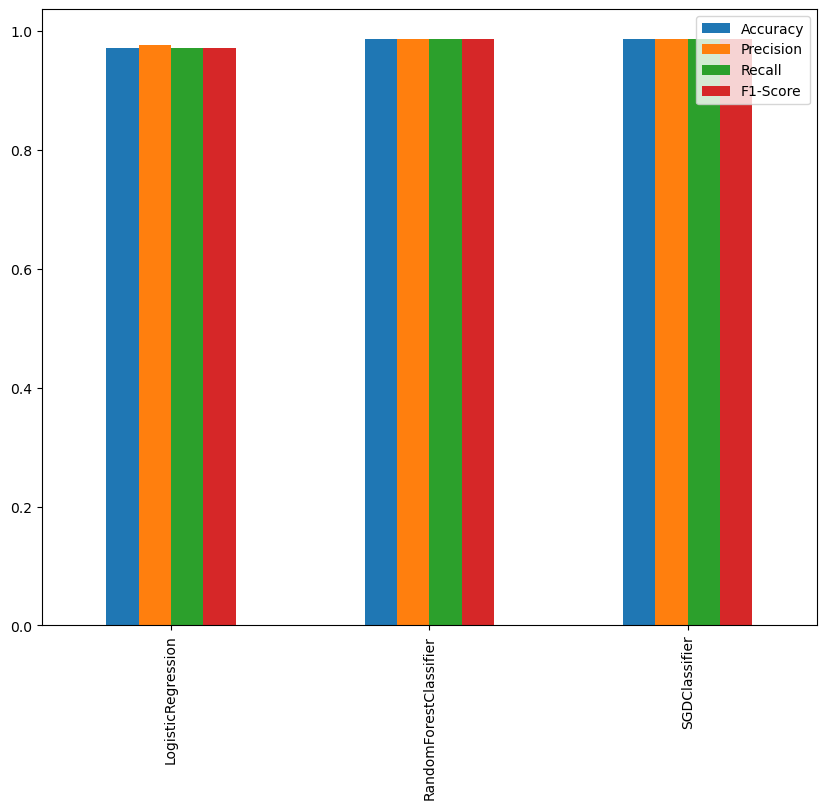

In [268]:
grid_tuned_results.plot.bar(figsize=(10, 8))

### Tuning/Improving Takeaway:
- RandomSearchCV and GridSearchCV yielded the same metrics given the set of hyperparameters I chose to tweak. 
- Logistic Regression actually dipped by 0.1 from its baseline model metric, while RandomForestClassifier and SGDClassifier both had the same accuracy. 

## Future Improvements
- I chose a lot of (but not exhaustive) different classifiers to run a baseline fit of the model for no apparent reason either. In order to crunch down the time of fitting too many, I ought to get familiar with the intricacies of the ensemble and other classification estimators, and pick out the ones that I know would be helpful for this ML task. 

- So far, I've been choosing hyperparameters to tweak arbitrarily. There is no real mathematical/scientific reason as to why I chose those set of numbers, or to tweak just those set of hyperparameters. In order to train the model better, I ought to choose these hyperparameters, and their values with good scientific backing/math reasons. 
